In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
xl=pd.ExcelFile('/Users/shreyakapoor/Downloads/NUCLEARFINAL.xlsx')
df=xl.parse('Sheet1') #Dataframe loaded using pandas library in Python.  

In [3]:
av=14.1 #volume term  
ass=13 #surface term 
ac=0.595 #coulombic repulsion term 
Aa=19  #Asymmetry term 

In [4]:
def func(X,av,ass,ac,Aa):
  Z=X[:,0]
  A=X[:,1]
  Y_pred=av-ass*(A**(float(-1)/3))-ac*((Z**2)*(A**(float(-4)/3)))-Aa*(((A-2*Z)**2)/(A**2))
  return Y_pred 

In [5]:
Z=np.array(df.Z)
A=np.array(df.A)
BE=np.array(df.iloc[:,6])
X=np.column_stack((Z,A))#stacking the two pandas series column wise. 
y=func(X,av,ass,ac,Aa) #Compute Y as a function of the values stored in X along with coefficients
                       #av, ass,ac,Aa

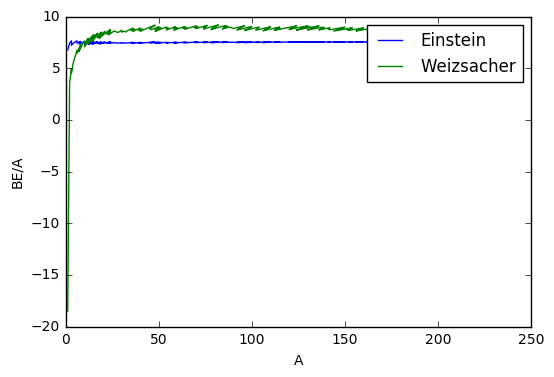

In [6]:
plt.xlabel('A')
plt.ylabel('BE/A')
plt.plot(A,BE,label='Einstein')
plt.plot(A,y,label='Weizsacher')
plt.legend()

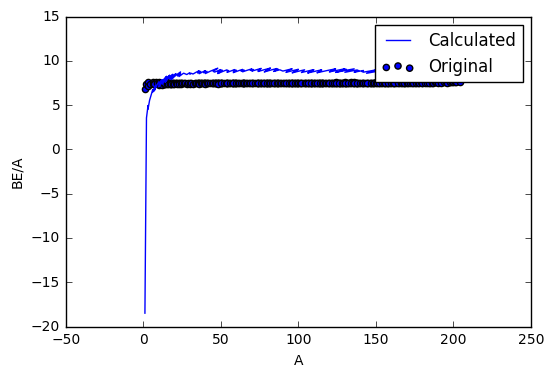

In [7]:
#scatter plot of the same
plt.xlabel('A')
plt.ylabel('BE/A')
plt.scatter(A,BE,label='Original')
plt.plot(A,y,label='Calculated')
plt.legend()
plt.show()

In [8]:
p0=10.8,7.32,11.14,8.2
#Initial Guess for the values of the coefficients

In [9]:
#Different methods for curve fitting  

In [10]:
print curve_fit(func,X,BE,p0)

(array([ 7.49006884,  0.14174163, -0.01355674,  0.58428994]), array([[  7.68237418e-04,   1.48755598e-03,   1.05668194e-04,
         -8.24986837e-04],
       [  1.48755598e-03,   3.04142103e-03,   1.96008206e-04,
         -1.74987346e-03],
       [  1.05668194e-04,   1.96008206e-04,   1.52994423e-05,
         -1.05639461e-04],
       [ -8.24986837e-04,  -1.74987346e-03,  -1.05639461e-04,
          2.55601372e-03]]))


In [11]:

print curve_fit(func,X,BE,p0,method='dogbox')

(array([ 7.49006883,  0.14174162, -0.01355674,  0.58428995]), array([[  7.68236835e-04,   1.48755492e-03,   1.05668102e-04,
         -8.24986189e-04],
       [  1.48755492e-03,   3.04141913e-03,   1.96008037e-04,
         -1.74987225e-03],
       [  1.05668102e-04,   1.96008037e-04,   1.52994280e-05,
         -1.05639362e-04],
       [ -8.24986189e-04,  -1.74987225e-03,  -1.05639362e-04,
          2.55601290e-03]]))


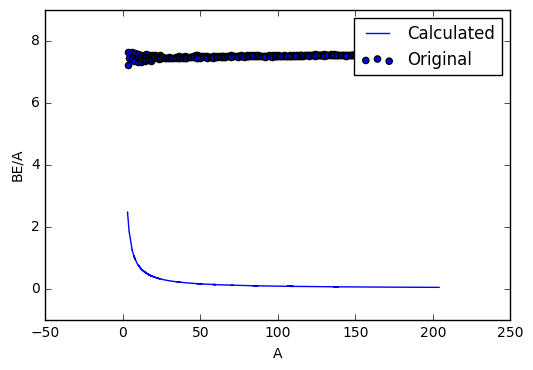

In [12]:
#binding energy fitted according to the Einstein's relation 
[a,b]=curve_fit(func,X,BE,p0)
BEtot=a[0]-a[1]*(A**(float(-1)/3))-a[2]*((Z**2)*(A**(float(-4)/3)))-a[3]*(((A-2*Z)**2)/A**2)
BEtot=BEtot/A
plt.scatter(A[2:],BE[2:],label='Original')
plt.plot(A[2:],BEtot[2:],label='Calculated')
plt.xlabel('A')
plt.ylabel('BE/A')
plt.legend()
plt.show()

Now taking Delta terms into account. 

In [13]:
def f(X,av,ass,ac,Aa):
  Z=X[:,0]
  A=X[:,1]
  Y=av*A
  Y-=ass*(A**(float(-1)/3))
  Y-=ac*((Z*(Z-1))*(A**(float(-4)/3)))
  Y-=Aa*(((A-2*Z)**2)*(A**(-2)))
  delta=np.zeros(len(Z))
  for i in range(len(Y)):
    if(Z[i]==1): 
        delta[i]=12*A[i]**(-1.75)
    elif((A[i]-Z[i])%2==0):
          if(Z[i]%2==0):
            delta[i]=33.5*A[i]**(-1.75)
    elif(Z[i]%2!=0):
               if((A[i]-Z[i])%2!=0):
                    delta[i]=(-33.5)*A[i]**(-1.75)
    else:
        delta[i]=0;
        
  Y=Y+delta
  return Y 

In [14]:
Y=f(X,av,ass,ac,Aa)
print curve_fit(f,X,BE,p0,method='dogbox')

(array([ -0.02355083, -12.30821014,  -1.86017607,  17.50706531]), array([[  3.43436989e-06,  -2.86458851e-04,   1.15007492e-04,
          2.89893221e-04],
       [ -2.86458851e-04,   6.31301033e-02,  -1.16990212e-02,
         -6.34165622e-02],
       [  1.15007492e-04,  -1.16990212e-02,   4.04663711e-03,
          1.18140287e-02],
       [  2.89893221e-04,  -6.34165622e-02,   1.18140287e-02,
          4.55284170e-01]]))


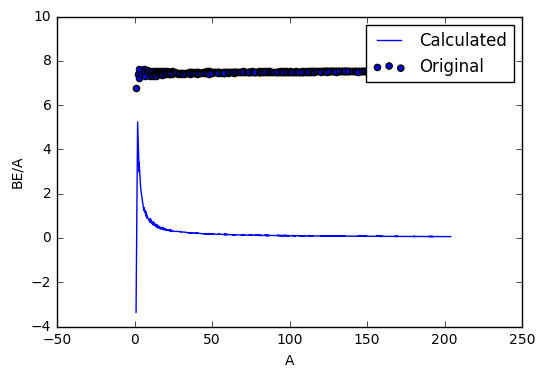

In [15]:
[a1,b1]=curve_fit(f,X,BE,p0,method='dogbox')
BEtot1=a1[0]-a1[1]*(A**(float(-1)/3))-a1[2]*((Z**2)*(A**(float(-4)/3)))-a1[3]*(((A-2*Z)**2)/A**(-2))
BEtot1=BEtot1/A
plt.scatter(A,BE,label='Original')
plt.plot(A,BEtot1,label='Calculated')
plt.xlabel('A')
plt.ylabel('BE/A')
plt.legend()
plt.show()

